In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random

nltk.download('stopwords')
  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
# Data Import
data = pd.read_json('reviewSelected100.json', lines=True, 
                    orient='records',encoding = "ISO-8859-1")

# Select business b1 and prepare B1
uniqueBusiness = data['business_id'].unique()
idx = random.randint(0, len(uniqueBusiness)-1)
print('random number for b1: ', idx)
b1 = uniqueBusiness[idx]
B1 = data.loc[data['business_id'] == b1]
B1 = pd.DataFrame(B1, columns = ['text'])
B1.rename(columns={"text": "original_text"}, inplace = True)

random number for b1:  58


In [101]:
B1.reset_index(inplace = True)
B1.drop(['index'], axis=1, inplace = True)
B1

,original_text
0,Disappointed in my Waffle. After my third cup ...
1,My hubby really wanted to try the waffles so o...
2,I've love Waffles INC a long time--since their...
3,"On a Monday morning at 9:30, one would expect ..."
4,What a welcome addition to Wexford! Literally ...
...,...
95,"On first impression, the new location in Wexfo..."
96,Went into the restaurant and waited to be seat...
97,Met a friend for breakfast. Waited quite awhil...
98,"I wanted to like this place more, but it was s..."


In [102]:
# Remove stopwords
for rowIdx in range(len(B1)):
    newString = ''
    s = B1.iloc[rowIdx]['original_text']
    for idx, word in enumerate(s.split(' ')):
        if word not in stopwords.words('english'):
            if idx == len(s)-1:
                newString = newString + word
            else:
                newString = newString + word + ' '
    
    B1.loc[rowIdx, 'text_without_stopwords'] = newString

In [103]:
B1

,original_text,text_without_stopwords
0,Disappointed in my Waffle. After my third cup ...,Disappointed Waffle. After third cup coffee wa...
1,My hubby really wanted to try the waffles so o...,My hubby really wanted try waffles one bluster...
2,I've love Waffles INC a long time--since their...,I've love Waffles INC long time--since New Bri...
3,"On a Monday morning at 9:30, one would expect ...","On Monday morning 9:30, one would expect servi..."
4,What a welcome addition to Wexford! Literally ...,What welcome addition Wexford! Literally locat...
...,...,...
95,"On first impression, the new location in Wexfo...","On first impression, new location Wexford one ..."
96,Went into the restaurant and waited to be seat...,Went restaurant waited seated. Had seat 2. Lot...
97,Met a friend for breakfast. Waited quite awhil...,Met friend breakfast. Waited quite awhile serv...
98,"I wanted to like this place more, but it was s...","I wanted like place more, solidly average. Th..."


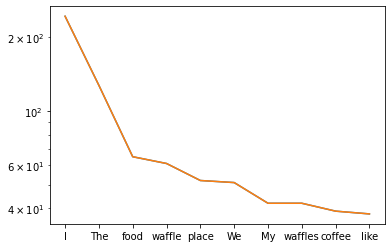

In [104]:
# Stemming
ps = PorterStemmer()
B1['stemmed_text'] = B1['text_without_stopwords'].apply(lambda x: ps.stem(x))

# Word Frequency Before Stemming
countsBefore = B1.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")

# Word Frequency After Stemming
countsAfter = B1.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")

In [108]:
# Select business b2 and prepare B2
uniqueBusiness = data['business_id'].unique()
idx2 = random.randint(0, len(uniqueBusiness)-1)
print('random num for b2: ', idx2)
b2 = uniqueBusiness[1]
B2 = data.loc[data['business_id'] == b2]
B2 = pd.DataFrame(B2, columns = ['text'])
B2.rename(columns={"text": "original_text"}, inplace = True)

random num for b2:  18


In [109]:
B2.reset_index(inplace = True)
B2.drop(['index'], axis=1, inplace = True)
B2

,original_text
0,Good Korean grill near Eaton Centre. The marin...
1,Good food..well you have to cook yourself.. bu...
2,I don't think I've ever been so disappointed i...
3,Great lunch price of $11 after tax and tip! \n...
4,Really bad service. You have to remind the ser...
...,...
95,You get what you pay for... and cheap is defin...
96,Was here by myself today. Probably should go w...
97,The only thing I like about this restaurant is...
98,Three friends and I dropped by here for lunch ...


In [110]:
# Remove stopwords
for rowIdx in range(len(B2)):
    newString = ''
    s = B2.iloc[rowIdx]['original_text']
    for idx, word in enumerate(s.split(' ')):
        if word not in stopwords.words('english'):
            if idx == len(s)-1:
                newString = newString + word
            else:
                newString = newString + word + ' '
    
    B2.loc[rowIdx, 'text_without_stopwords'] = newString

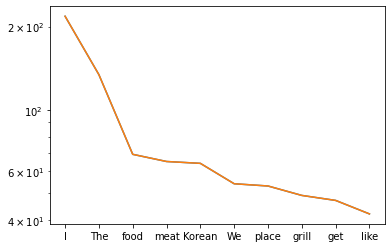

In [112]:
# Stemming
ps = PorterStemmer()
B2['stemmed_text'] = B2['text_without_stopwords'].apply(lambda x: ps.stem(x))

# Word Frequency Before Stemming
countsBefore = B2.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")

# Word Frequency After Stemming
countsAfter = B2.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")